### Exploratory Data Analysis - Casino Jitter Data
#### Author: Kaza Razat

### Introduction

Conduct exploratory data analysis (EDA) on a casino jitter dataset to determine important relationships or key insights in preparation for predictive models to help the casino determine the best time of day to open X number of tables for particular casino games.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv"
casino_data = pd.read_csv(url).reset_index(drop=True)

In [3]:
print (casino_data.shape)

(175677, 9)


In [4]:
casino_data.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [5]:
# Initial Summary Stats
casino_data.dtypes

GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object

In [6]:
casino_data.head(10)

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47
5,BA,9/16/2011,11,0,1,0,0,6,47
6,BA,9/16/2011,12,0,1,0,0,6,47
7,BA,9/16/2011,13,0,1,0,0,6,47
8,BA,9/16/2011,14,0,1,0,0,6,47
9,BA,9/16/2011,15,0,1,0,0,6,47


In [184]:
# Create a new Data column formatted properly to use for time series plots
casino_data.loc[:, 'Date'] = pd.to_datetime(casino_data.loc[:, 'DateFormat'])

In [7]:
casino_data.head(10)

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47
5,BA,9/16/2011,11,0,1,0,0,6,47
6,BA,9/16/2011,12,0,1,0,0,6,47
7,BA,9/16/2011,13,0,1,0,0,6,47
8,BA,9/16/2011,14,0,1,0,0,6,47
9,BA,9/16/2011,15,0,1,0,0,6,47


### Correlation plots

As a starting point to help indentity what possible value relationships to explore we have a function
to plot a heatmap of all the numerical values in the dataset. This function can later be expanded to exclude values as well.

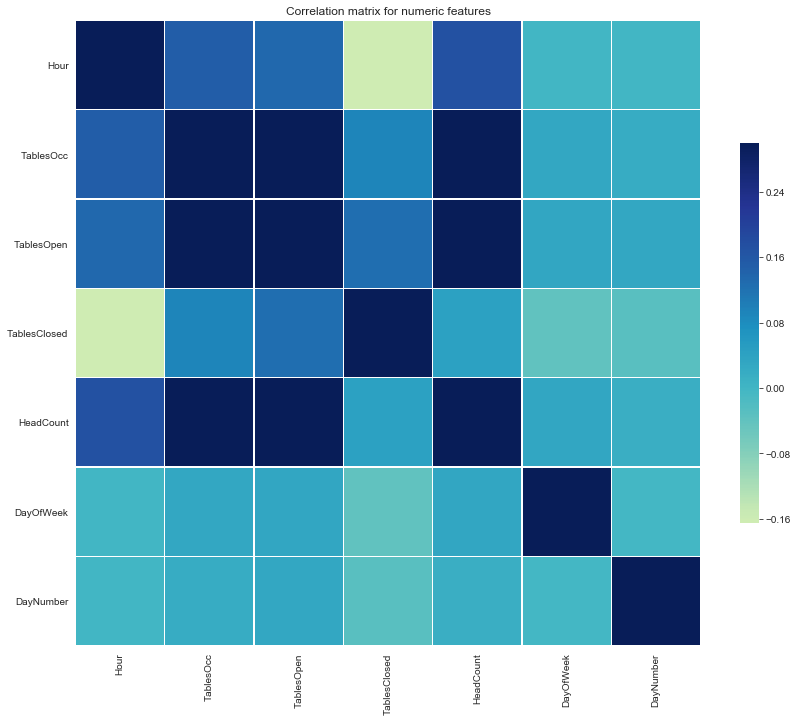

In [186]:
# A function to plot of a heatmap of the correlation of data numerical values
def corr_heatmap():
    vals_corr = casino_data[['Hour', 
                             'TablesOcc', 
                             'TablesOpen', 
                             'TablesClosed', 
                             'HeadCount',
                             'DayOfWeek',
                             'DayNumber'
                            ]].corr()
    plt.subplots(figsize=(14,14))
    sns.color_palette("BuGn_r")
    sns.heatmap(vals_corr, vmax=.3, center=0,cmap="YlGnBu",
                square=True, linewidths=.25, cbar_kws={"shrink": .5})
    plt.title('Correlation matrix for numeric features')
    plt.yticks(rotation='horizontal')
    plt.xticks(rotation='vertical')
    return
corr_heatmap()

In [9]:
# Create a new categorical column from the DayOfWeek column
casino_data.loc[casino_data.loc[:, "DayOfWeek"] == 1, "DayName"] = "Sunday"
casino_data.loc[casino_data.loc[:, "DayOfWeek"] == 2, "DayName"] = "Monday"
casino_data.loc[casino_data.loc[:, "DayOfWeek"] == 3, "DayName"] = "Tuesday"
casino_data.loc[casino_data.loc[:, "DayOfWeek"] == 4, "DayName"] = "Wednesday"
casino_data.loc[casino_data.loc[:, "DayOfWeek"] == 5, "DayName"] = "Thursday"
casino_data.loc[casino_data.loc[:, "DayOfWeek"] == 6, "DayName"] = "Friday"
casino_data.loc[casino_data.loc[:, "DayOfWeek"] == 7, "DayName"] = "Saturday"

In [10]:
tables_open = casino_data[["GameCode","TablesOpen","DayName","DayOfWeek","DayNumber","Hour"]]

In [11]:
tables_open.loc[:, 'hours_bin'] = pd.cut(tables_open.loc[:, 'Hour'], bins=3,labels=["Morning","Afternoon","Evening"])

In [12]:
# Create a pivot table that is a slice of the main dataset to focus on Tables that were opened
tables_open = pd.pivot_table(tables_open, index=['GameCode','DayNumber','DayName','hours_bin','DayOfWeek'], values='TablesOpen', aggfunc='sum')

In [13]:
tables_open.head(10)

TablesOpen
GameCode DayNumber DayName  hours_bin DayOfWeek            
BA       47        Friday   Morning   6                   0
                            Afternoon 6                   6
                            Evening   6                   8
         48        Saturday Morning   7                   8
                            Afternoon 7                   8
                            Evening   7                   8
         49        Sunday   Morning   1                   8
                            Afternoon 1                   8
                            Evening   1                   8
         50        Monday   Morning   2                   8

In [194]:
# View data of day, time of day (categorical) and number of tables open for game code by day number
tables_open.loc['BA', 47]

TablesOpen
DayName hours_bin DayOfWeek            
Friday  Morning   6                   0
        Afternoon 6                   6
        Evening   6                   8

### Facet Grid Histograms

A function that takes a game code and plots a facet grid of histograms showing the distribution of open tables by day of the week accross the range of days that game code has data. Texas Hold'em poker is probably one of the most popular tables at a casino so we will input that game code to view the data. We can see from the plots that tables being opened align with the likely traffic flowing into the casino during busy times of a given week day. We can also see the values increase on the weekends.

    DayNumber    DayName  hours_bin  DayOfWeek  TablesOpen
0           1     Monday    Morning          2          27
1           1     Monday  Afternoon          2          45
2           1     Monday    Evening          2          66
3           2    Tuesday    Morning          3          32
4           2    Tuesday  Afternoon          3          43
5           2    Tuesday    Evening          3          64
6           3  Wednesday    Morning          4          28
7           3  Wednesday  Afternoon          4          40
8           3  Wednesday    Evening          4          63
9           4   Thursday    Morning          5          32
10          4   Thursday  Afternoon          5          40
11          4   Thursday    Evening          5          64
12          5     Friday    Morning          6          27
13          5     Friday  Afternoon          6          54
14          5     Friday    Evening          6          88
15          6   Saturday    Morning          7          

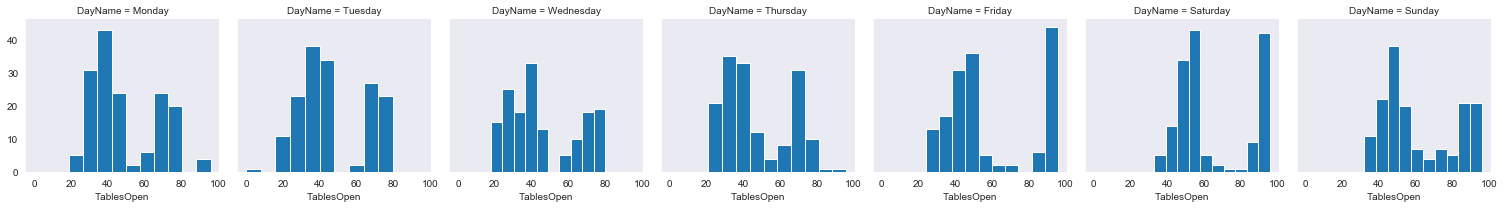

In [195]:
# Function takes a game code as string and plots a facet grid of the distribution of open tables by day of the week
def facetHist(game_code):
    tables_open_tp = tables_open.loc[game_code]
    tables_open_tp.reset_index(inplace=True)
    print (tables_open_tp.head(20))
    gr = sns.FacetGrid(tables_open_tp, col="DayName")
    gr = gr.map(plt.hist, "TablesOpen")
    return

facetHist("TP")

### Hexbin plots
The hexbin plot avoids the issue of overplotting so that the relationship of 
the quantity of open tables by game code can be viewed over the range of days.
By creating a function that takes the game code as input we can easily plot hexbins
for any of the game codes.

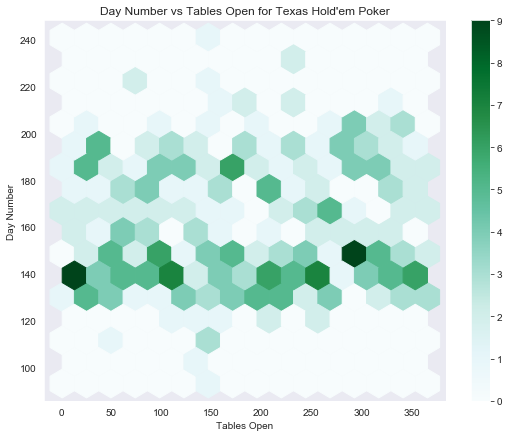

In [196]:
# a Function that takes game code and name as a string to plot hexbins on days vs open tables
def hexbin_plot(game_code,game_name):
    t = pd.pivot_table(tables_open.loc[game_code], index=['DayNumber'], values='TablesOpen', aggfunc='sum')
    t.reset_index(inplace=True)
    ax = plt.figure(figsize=(9, 7)).gca() # define axis
    t.plot.hexbin(x = 'DayNumber', y = 'TablesOpen', gridsize = 15, ax = ax)
    ax.set_title('Day Number vs Tables Open for {}'.format(game_name))
    ax.set_ylabel('Day Number')# Set text for y axis
    ax.set_xlabel('Tables Open')
    return

hexbin_plot("TP","Texas Hold'em Poker")

### Facet Grids
The facet grid with scatter points is being used to show how many tables are open for a give game code by day of the week and hours of the day binned into morning, afternoon and evening categories.

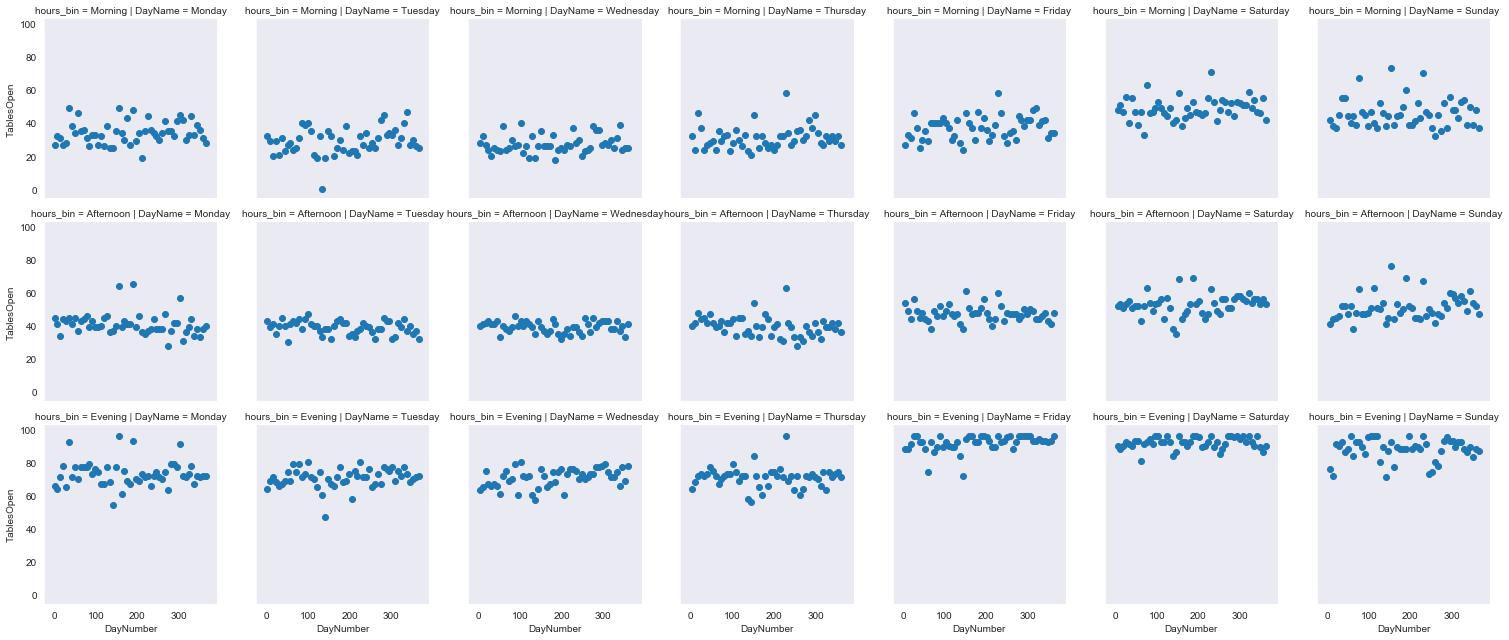

In [197]:
def facetGrid(game_code):
    t = tables_open.loc[game_code]
    t.reset_index(inplace=True)
    g = sns.FacetGrid(t, 
                      col="DayName", 
                      row='hours_bin', 
                      palette="Set1")
    g = g.map(plt.scatter, "DayNumber", "TablesOpen") 
    return plt.show()

facetGrid("TP")

In [198]:
tables_open.loc["TP"].head()

TablesOpen
DayNumber DayName hours_bin DayOfWeek            
1         Monday  Morning   2                  27
                  Afternoon 2                  45
                  Evening   2                  66
2         Tuesday Morning   3                  32
                  Afternoon 3                  43

### Scatter Plot with Marker and Color
A function that plots a scatter chart of the number of Open tables for a given casino game over all days in the dataset. The points are marked and colored by categorical hourly ranges during the day. This plot can be improved by plotting marker size with additional numeric data if available. The example plot for the Texas Hold'em Poker game code shows the slight increase in open tables from Day 1 through Day 366 by time of day.

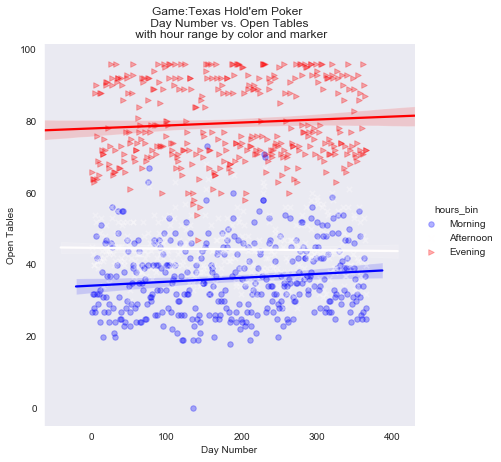

In [199]:
def colorScatter(game_code,game_name):
    t = tables_open.loc[game_code]
    t.reset_index(inplace=True)
    sns.lmplot(x = 'DayNumber', y = 'TablesOpen', 
               data = t, 
               hue = 'hours_bin',
               size=6, 
               markers=["o", "x",">"],
               palette="seismic", 
               scatter_kws={'alpha':0.3,'s': 30},
               fit_reg = True)
    plt.xlabel('Day Number')
    plt.ylabel('Open Tables')
    plt.title('Game:{} \n Day Number vs. Open Tables \n with hour range by color and marker'.format(game_name))
    return

colorScatter("TP","Texas Hold'em Poker")
